In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans


In [4]:
df= pd.read_csv("E:\customer_chrun.csv")
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
#removing the unwanted column 
df = df.drop(['columns4'], axis=1)


In [7]:
# Define the new column names
new_columns = [
    "State",
    "Account Length",
    "Area Code",
    "International Plan",
    "VMail Plan",
    "VMail Message",
    "Day Mins",
    "Day Calls",
    "Day Charge",
    "Eve Mins",
    "Eve Calls",
    "Eve Charge",
    "Night Mins",
    "Night Calls",
    "Night Charge",
    "International Mins",
    "International Calls",
    "International Charge",
    "CustServ Calls",
    "Churn"
]

# Replace the column names
df.columns = new_columns


In [8]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
df=df.drop_duplicates()
df.shape

(4617, 20)

NO duplicates where found so nothing was removed

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

In [11]:
column = df.columns 
for i in column:
    print(df.dtypes[i])

object
int64
int64
object
object
int64
float64
int64
float64
float64
int64
float64
float64
int64
float64
float64
int64
float64
int64
object


In [12]:
#Checking for null values
df.isnull().sum()

State                   0
Account Length          0
Area Code               0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [13]:
data=df.copy()

In [14]:
data.nunique()


State                     51
Account Length           218
Area Code                  3
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International Calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64

In [15]:
print(data.describe(include='all'))  # Summary of numeric and categorical data


       State  Account Length    Area Code International Plan VMail Plan  \
count   4617     4617.000000  4617.000000               4617       4617   
unique    51             NaN          NaN                  2          2   
top       WV             NaN          NaN                 no         no   
freq     149             NaN          NaN               4171       3381   
mean     NaN      100.645224   437.046350                NaN        NaN   
std      NaN       39.597194    42.288212                NaN        NaN   
min      NaN        1.000000   408.000000                NaN        NaN   
25%      NaN       74.000000   408.000000                NaN        NaN   
50%      NaN      100.000000   415.000000                NaN        NaN   
75%      NaN      127.000000   510.000000                NaN        NaN   
max      NaN      243.000000   510.000000                NaN        NaN   

        VMail Message     Day Mins    Day Calls   Day Charge     Eve Mins  \
count     4617.000000 

In [16]:
data['State'] = data['State'].str.strip()  # Remove leading/trailing spaces


In [17]:
data['International Plan'] = data['International Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['VMail Plan'] = data['VMail Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['State'] = data['State'].str.replace(r'[,.:;]', '', regex=True).str.strip()

In [18]:
# Apply Label Encoding
for col in ['International Plan', 'VMail Plan']:
    data[col] = LabelEncoder().fit_transform(data[col])

In [19]:
# Frequency Encoding
for col in ['State']:
    freq = data[col].value_counts() / len(data)
    data[col] = data[col].map(freq)

In [35]:
import pandas as pd

def verify_and_correct_frequency_encoding(data, column):
    # Step 1: Recompute frequency encoding
    recomputed_freq = data[column].value_counts() / len(data)
    
    # Step 2: Map the recomputed values to a new column
    recomputed_encoded = data[column].map(recomputed_freq)
    
    # Step 3: Compare original and recomputed values
    mismatches = data[data[column] != recomputed_encoded]
    
    # Step 4: Print mismatched rows (if any)
    if not mismatches.empty:
        print(f"Mismatched values found in column '{column}':")
        print(mismatches[[column]])
        print("\nRecomputing correct encoding...")
        data[column] = recomputed_encoded
        print(f"Corrected the encoding for column '{column}'.")
    else:
        print(f"No mismatches found in column '{column}'.")
    
    return data

# Verify and correct frequency encoding for 'State'
data = verify_and_correct_frequency_encoding(data, 'State')


Mismatched values found in column 'State':
         State
1     0.023825
2     0.022959
3     0.023825
4     0.017327
7     0.018194
...        ...
4611  0.017111
4612  0.023608
4613  0.018194
4614  0.020576
4616  0.019277

[2893 rows x 1 columns]

Recomputing correct encoding...
Corrected the encoding for column 'State'.


In [ ]:
# Check unique values in the columns that were encoded
for col in ['International Plan', 'VMail Plan', 'Chrun']:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

In [20]:
data.head(20)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,0.020793,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,0.023825,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0.022959,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0.023825,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0.017327,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,0.024691,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,0.021009,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,0.018194,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,0.015811,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,0.032272,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [21]:
# Convert 'True' and 'False' to 1 and 0, respectively
data['Chrun']=data['Churn'].map({' True.': 1, ' False.': 0})

In [22]:
data

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Chrun
0,0.020793,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,0.023825,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,0.022959,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,0.023825,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,0.017327,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.023608,57,510,0,1,25,144.0,81,24.48,187.2,...,15.91,158.6,122,7.14,8.5,6,2.30,3,False.,0
4613,0.018194,177,408,0,1,29,189.0,91,32.13,303.1,...,25.76,163.6,116,7.36,15.7,1,4.24,3,False.,0
4614,0.020576,67,408,0,1,33,127.5,126,21.68,296.1,...,25.17,200.9,91,9.04,13.0,3,3.51,1,False.,0
4615,0.021226,98,415,0,1,23,168.9,98,28.71,226.3,...,19.24,165.5,96,7.45,14.3,3,3.86,0,False.,0


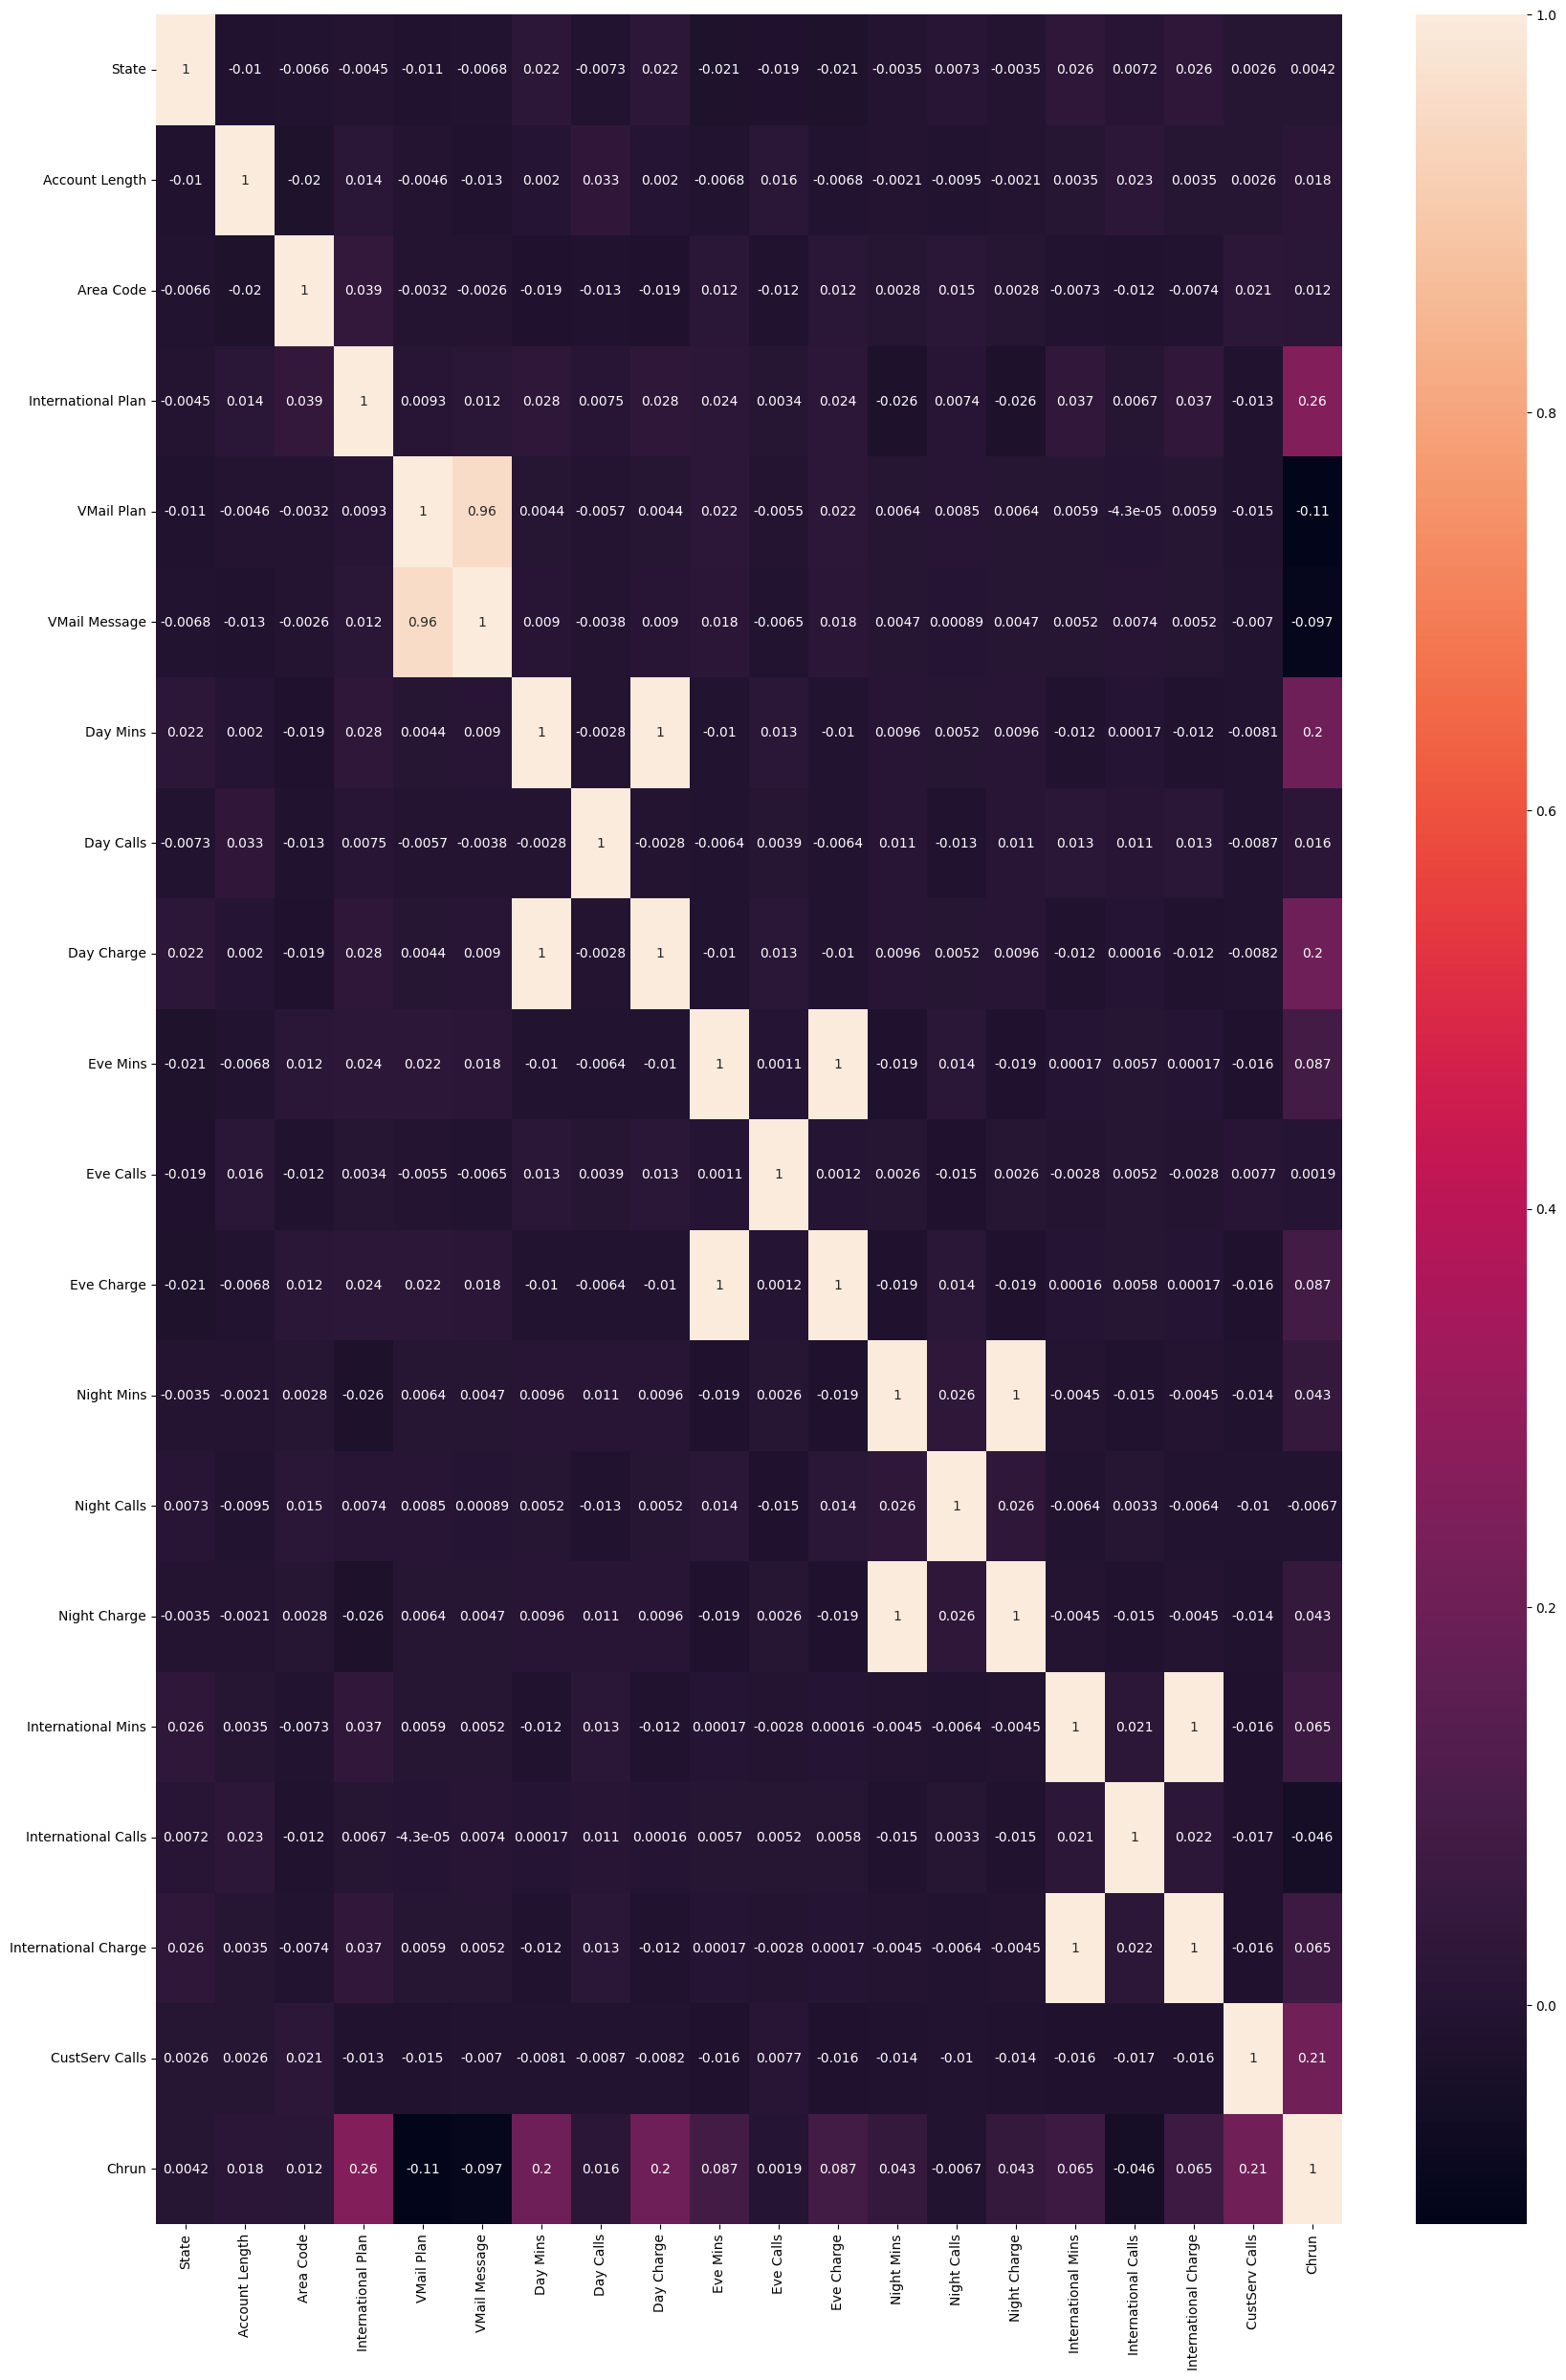

In [24]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize']=(20,90)
plt.show()

Ignoring the columns which have negative corealtion 
'VMail Plan','VMail Message','Night Calls','International Calls'

In [25]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn', 'Chrun'],
      dtype='object')

In [28]:
data = data.drop(['VMail Plan', 'VMail Message', 'Night Calls', 'International Calls'], axis=1)

In [29]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
       'International Charge', 'CustServ Calls', 'Churn', 'Chrun'],
      dtype='object')

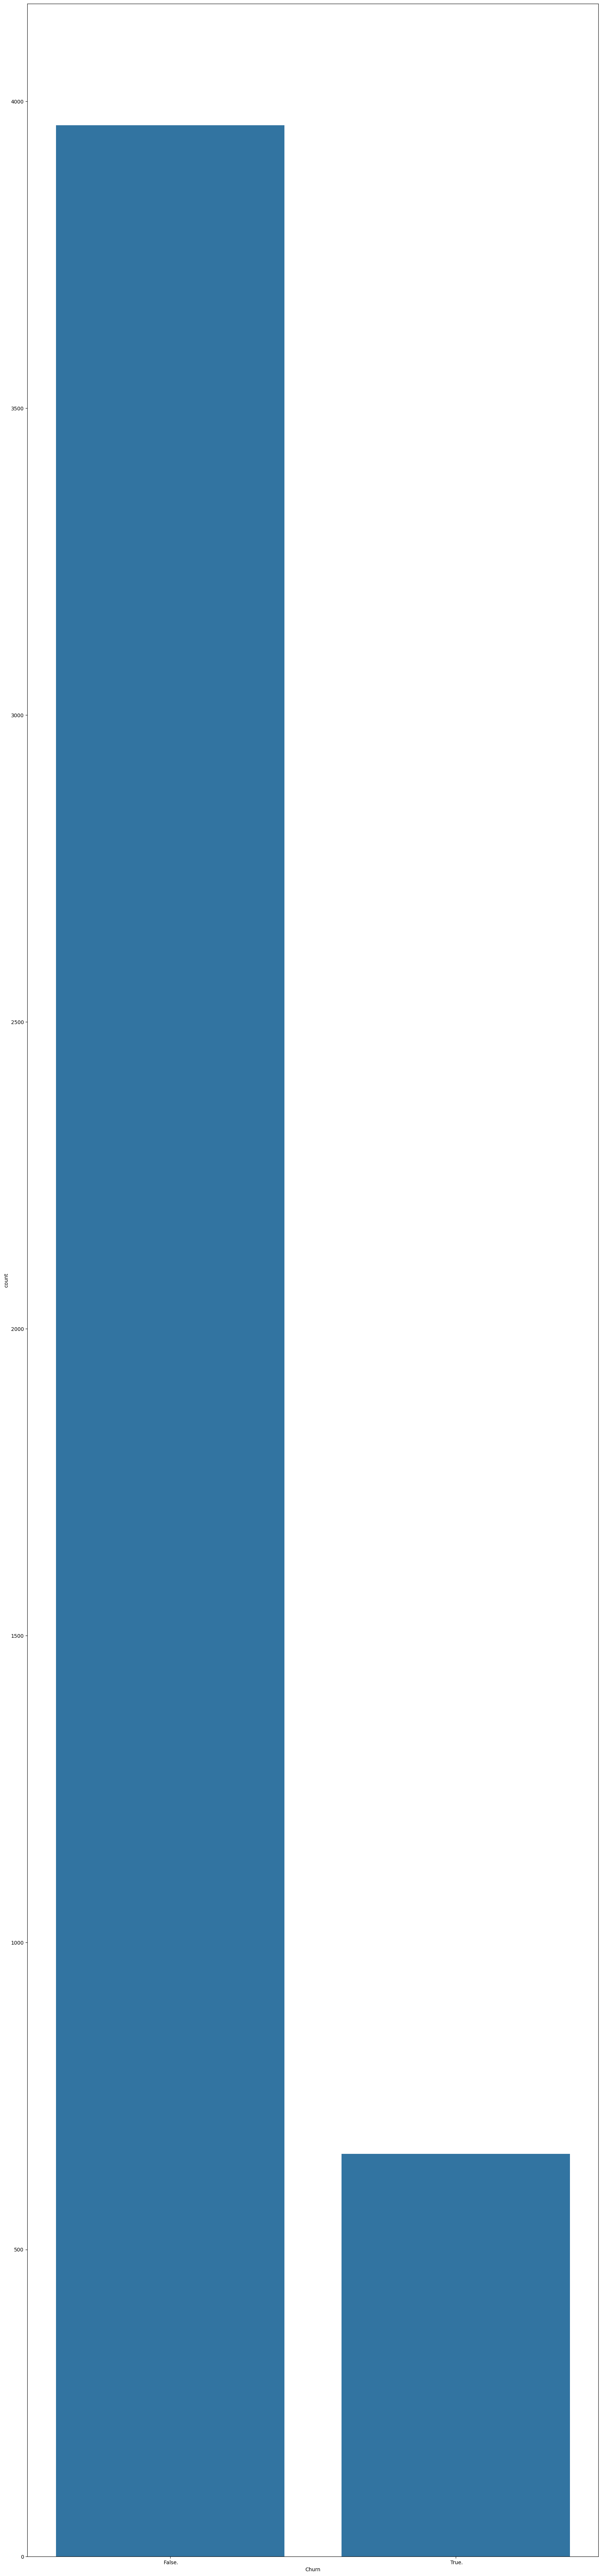

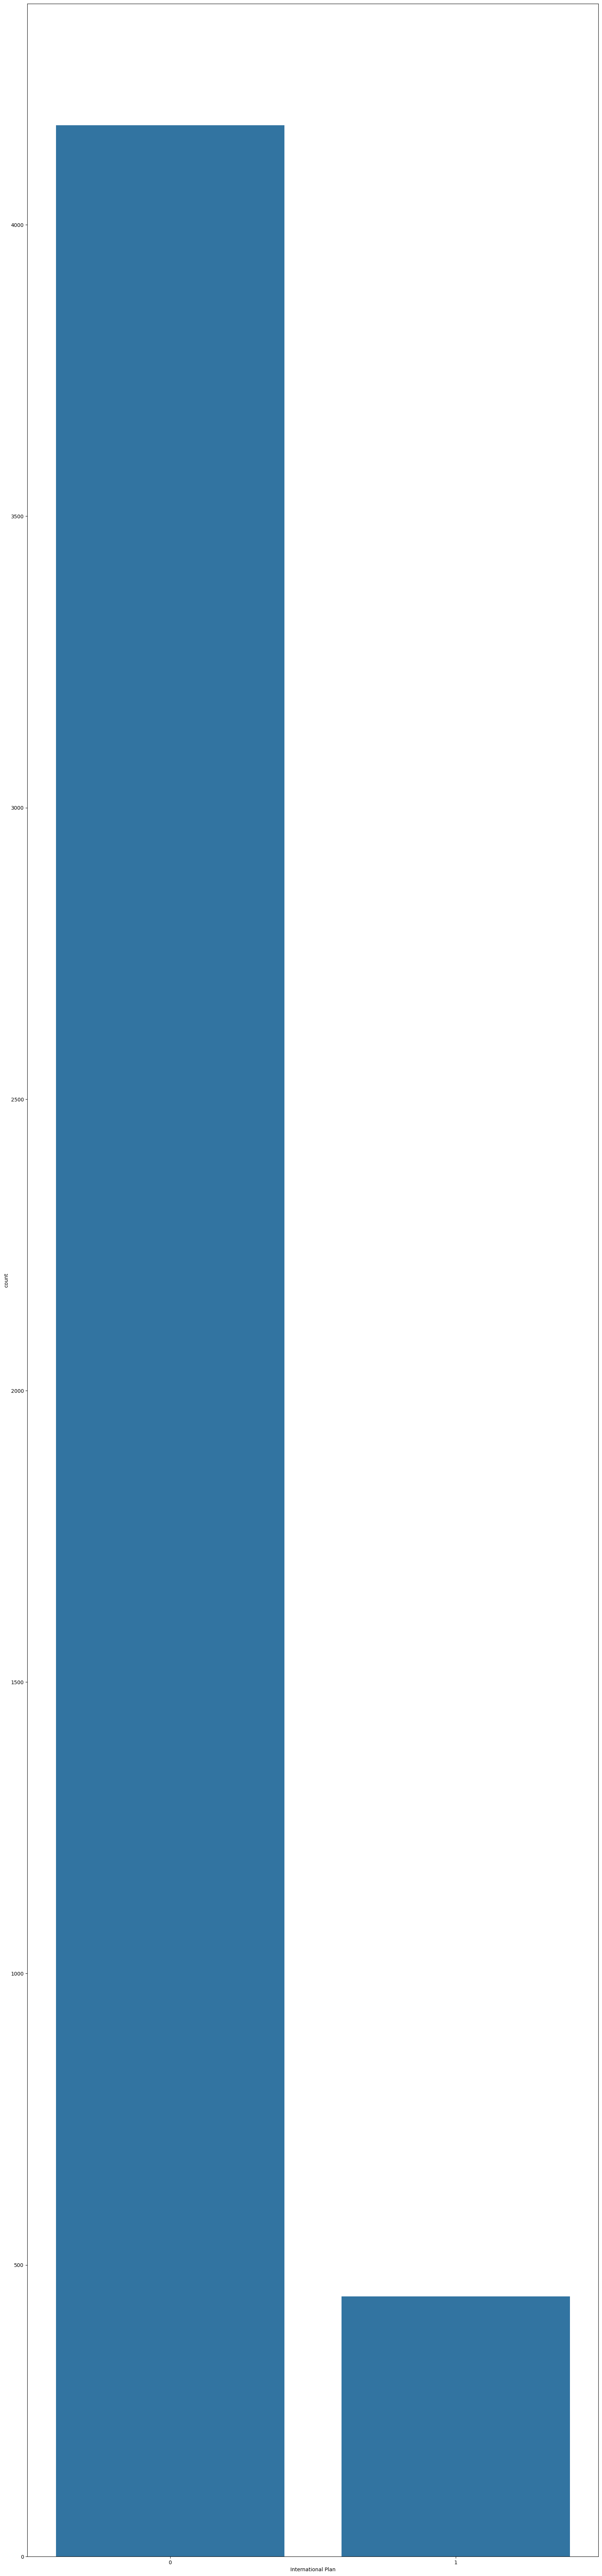

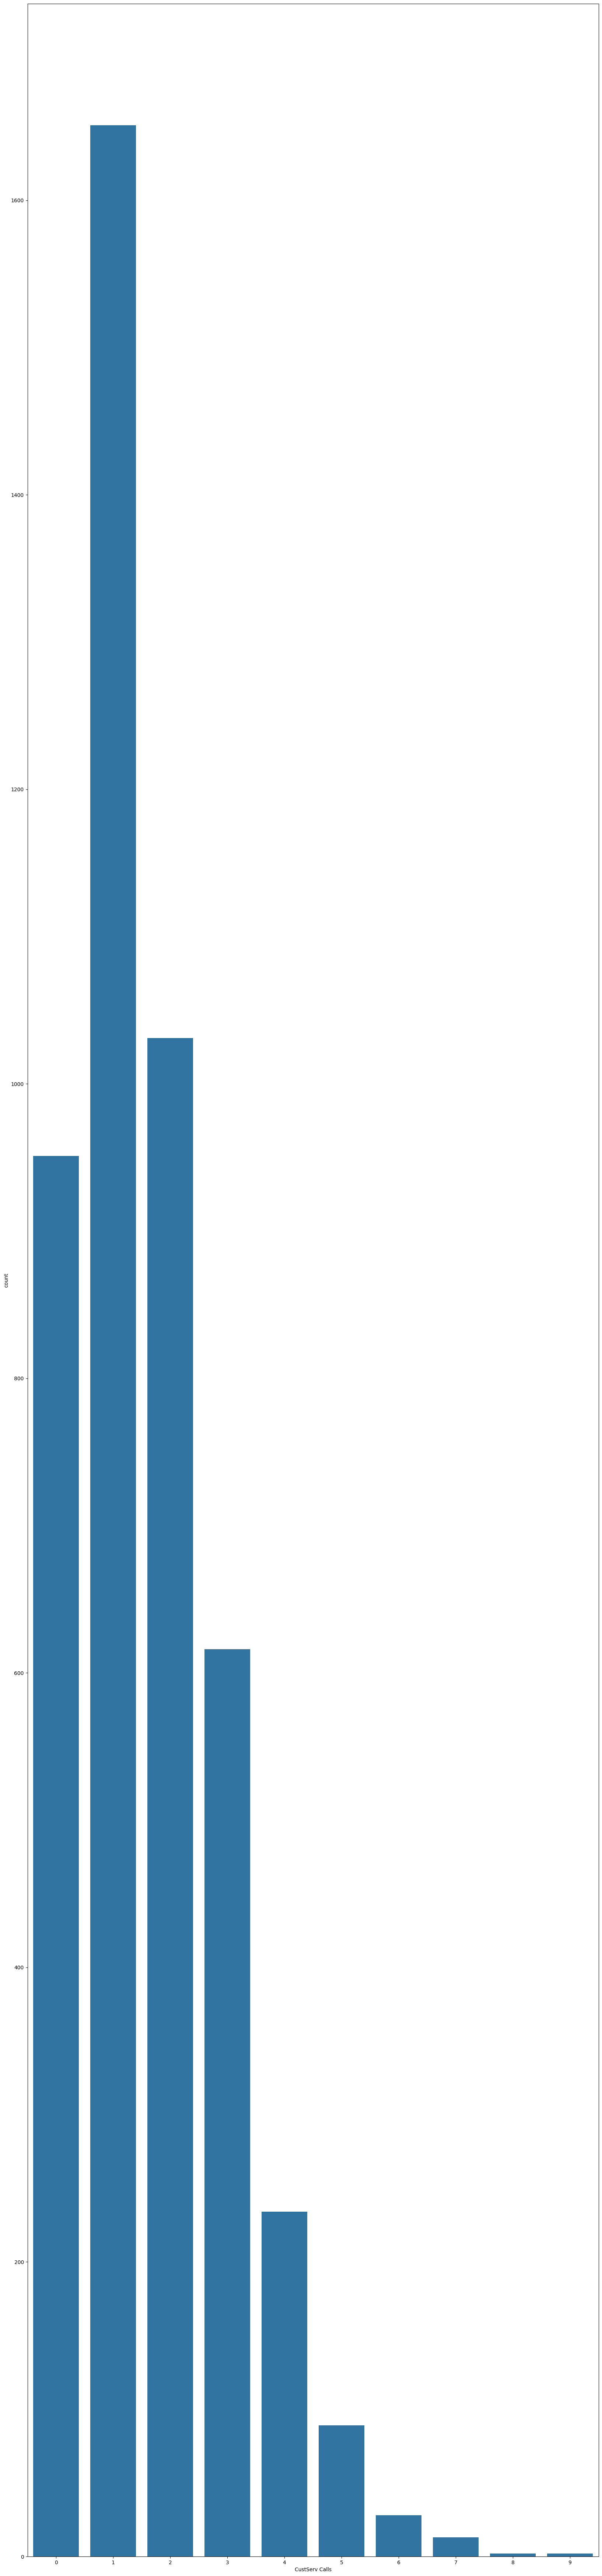

In [30]:
sns.countplot(x='Churn', data=data)
plt.show()
sns.countplot(x='International Plan', data=data)
plt.show()
sns.countplot(x='CustServ Calls', data=data)
plt.show()


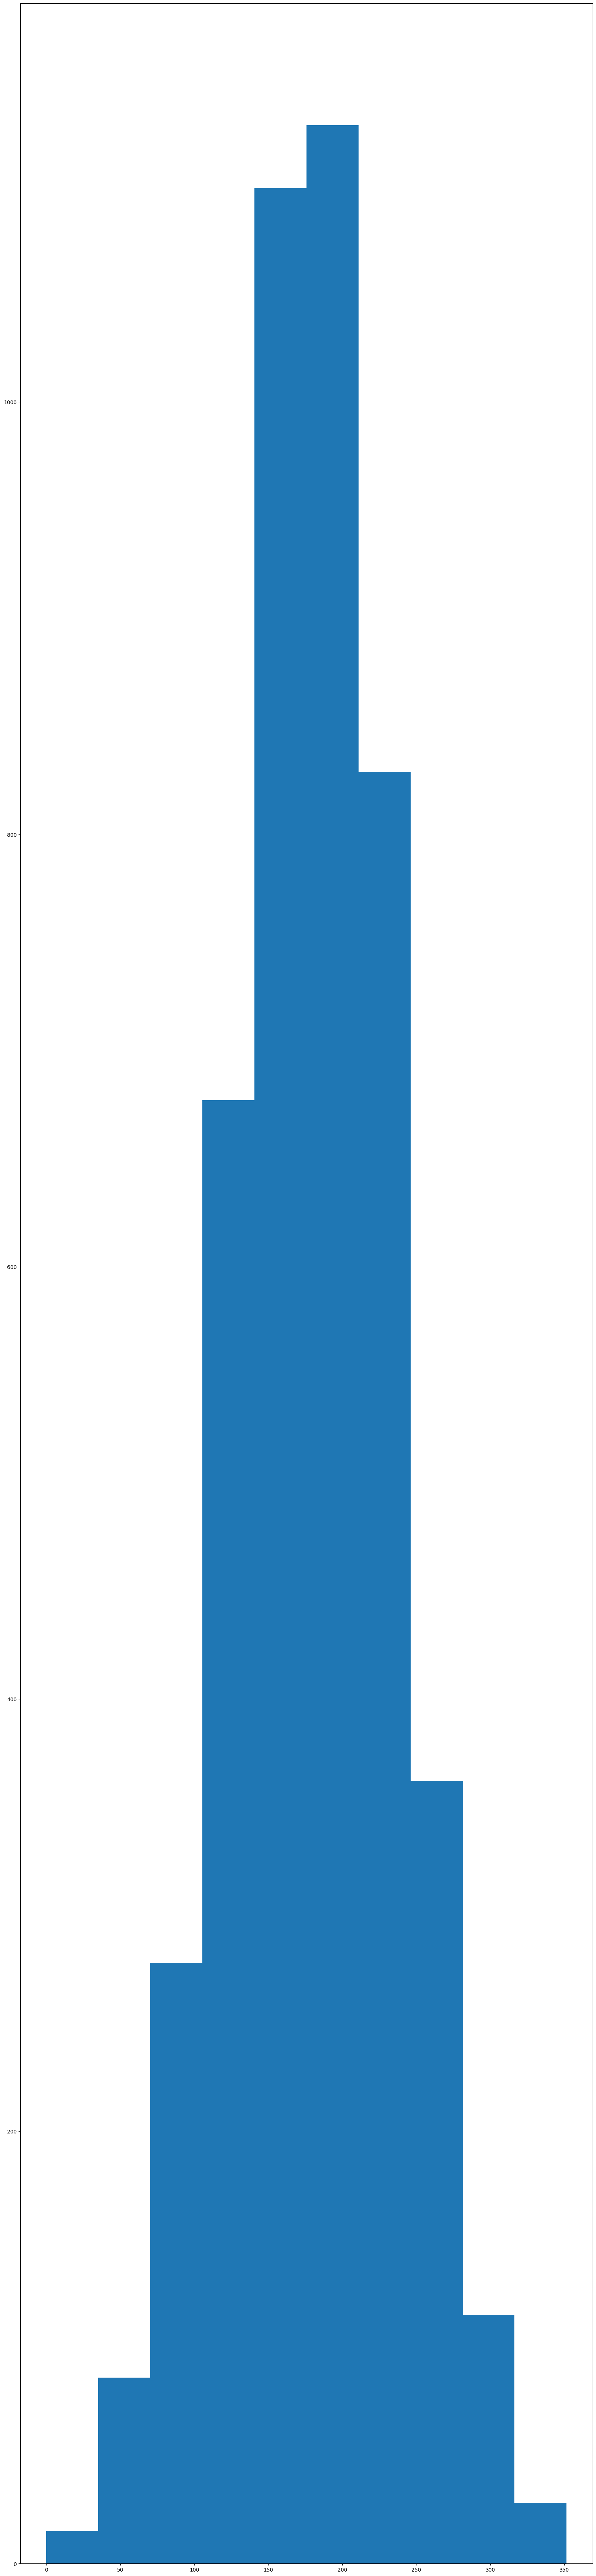

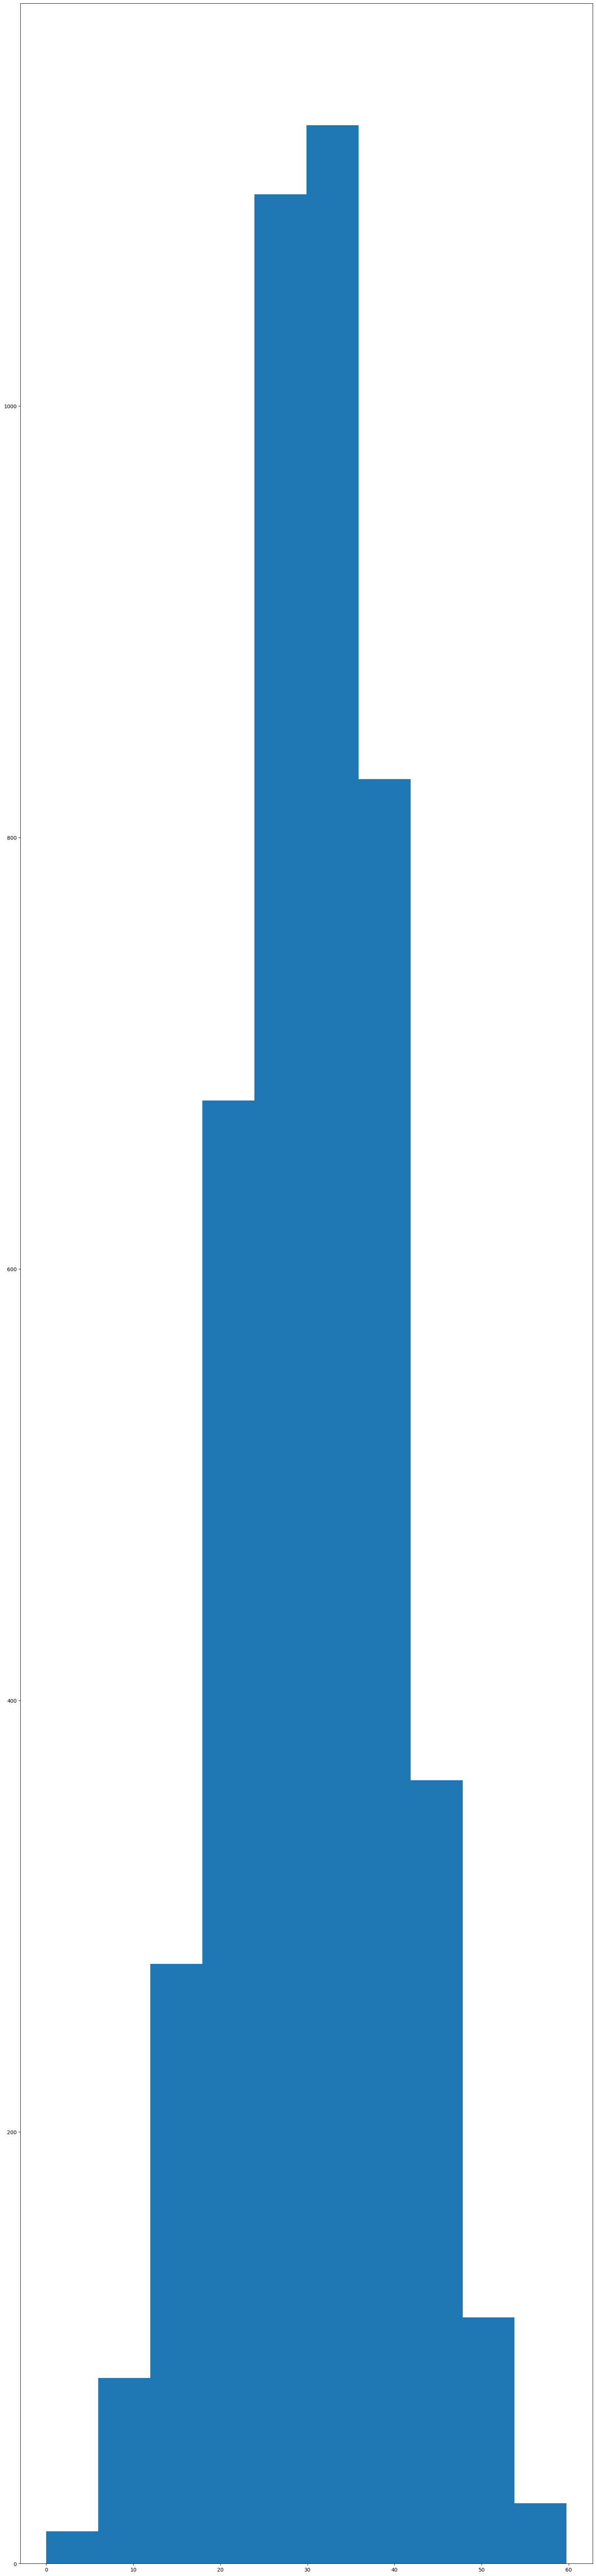

In [31]:
plt.hist(data['Day Mins'])
plt.show()
plt.hist(data['Day Charge'])
plt.show()

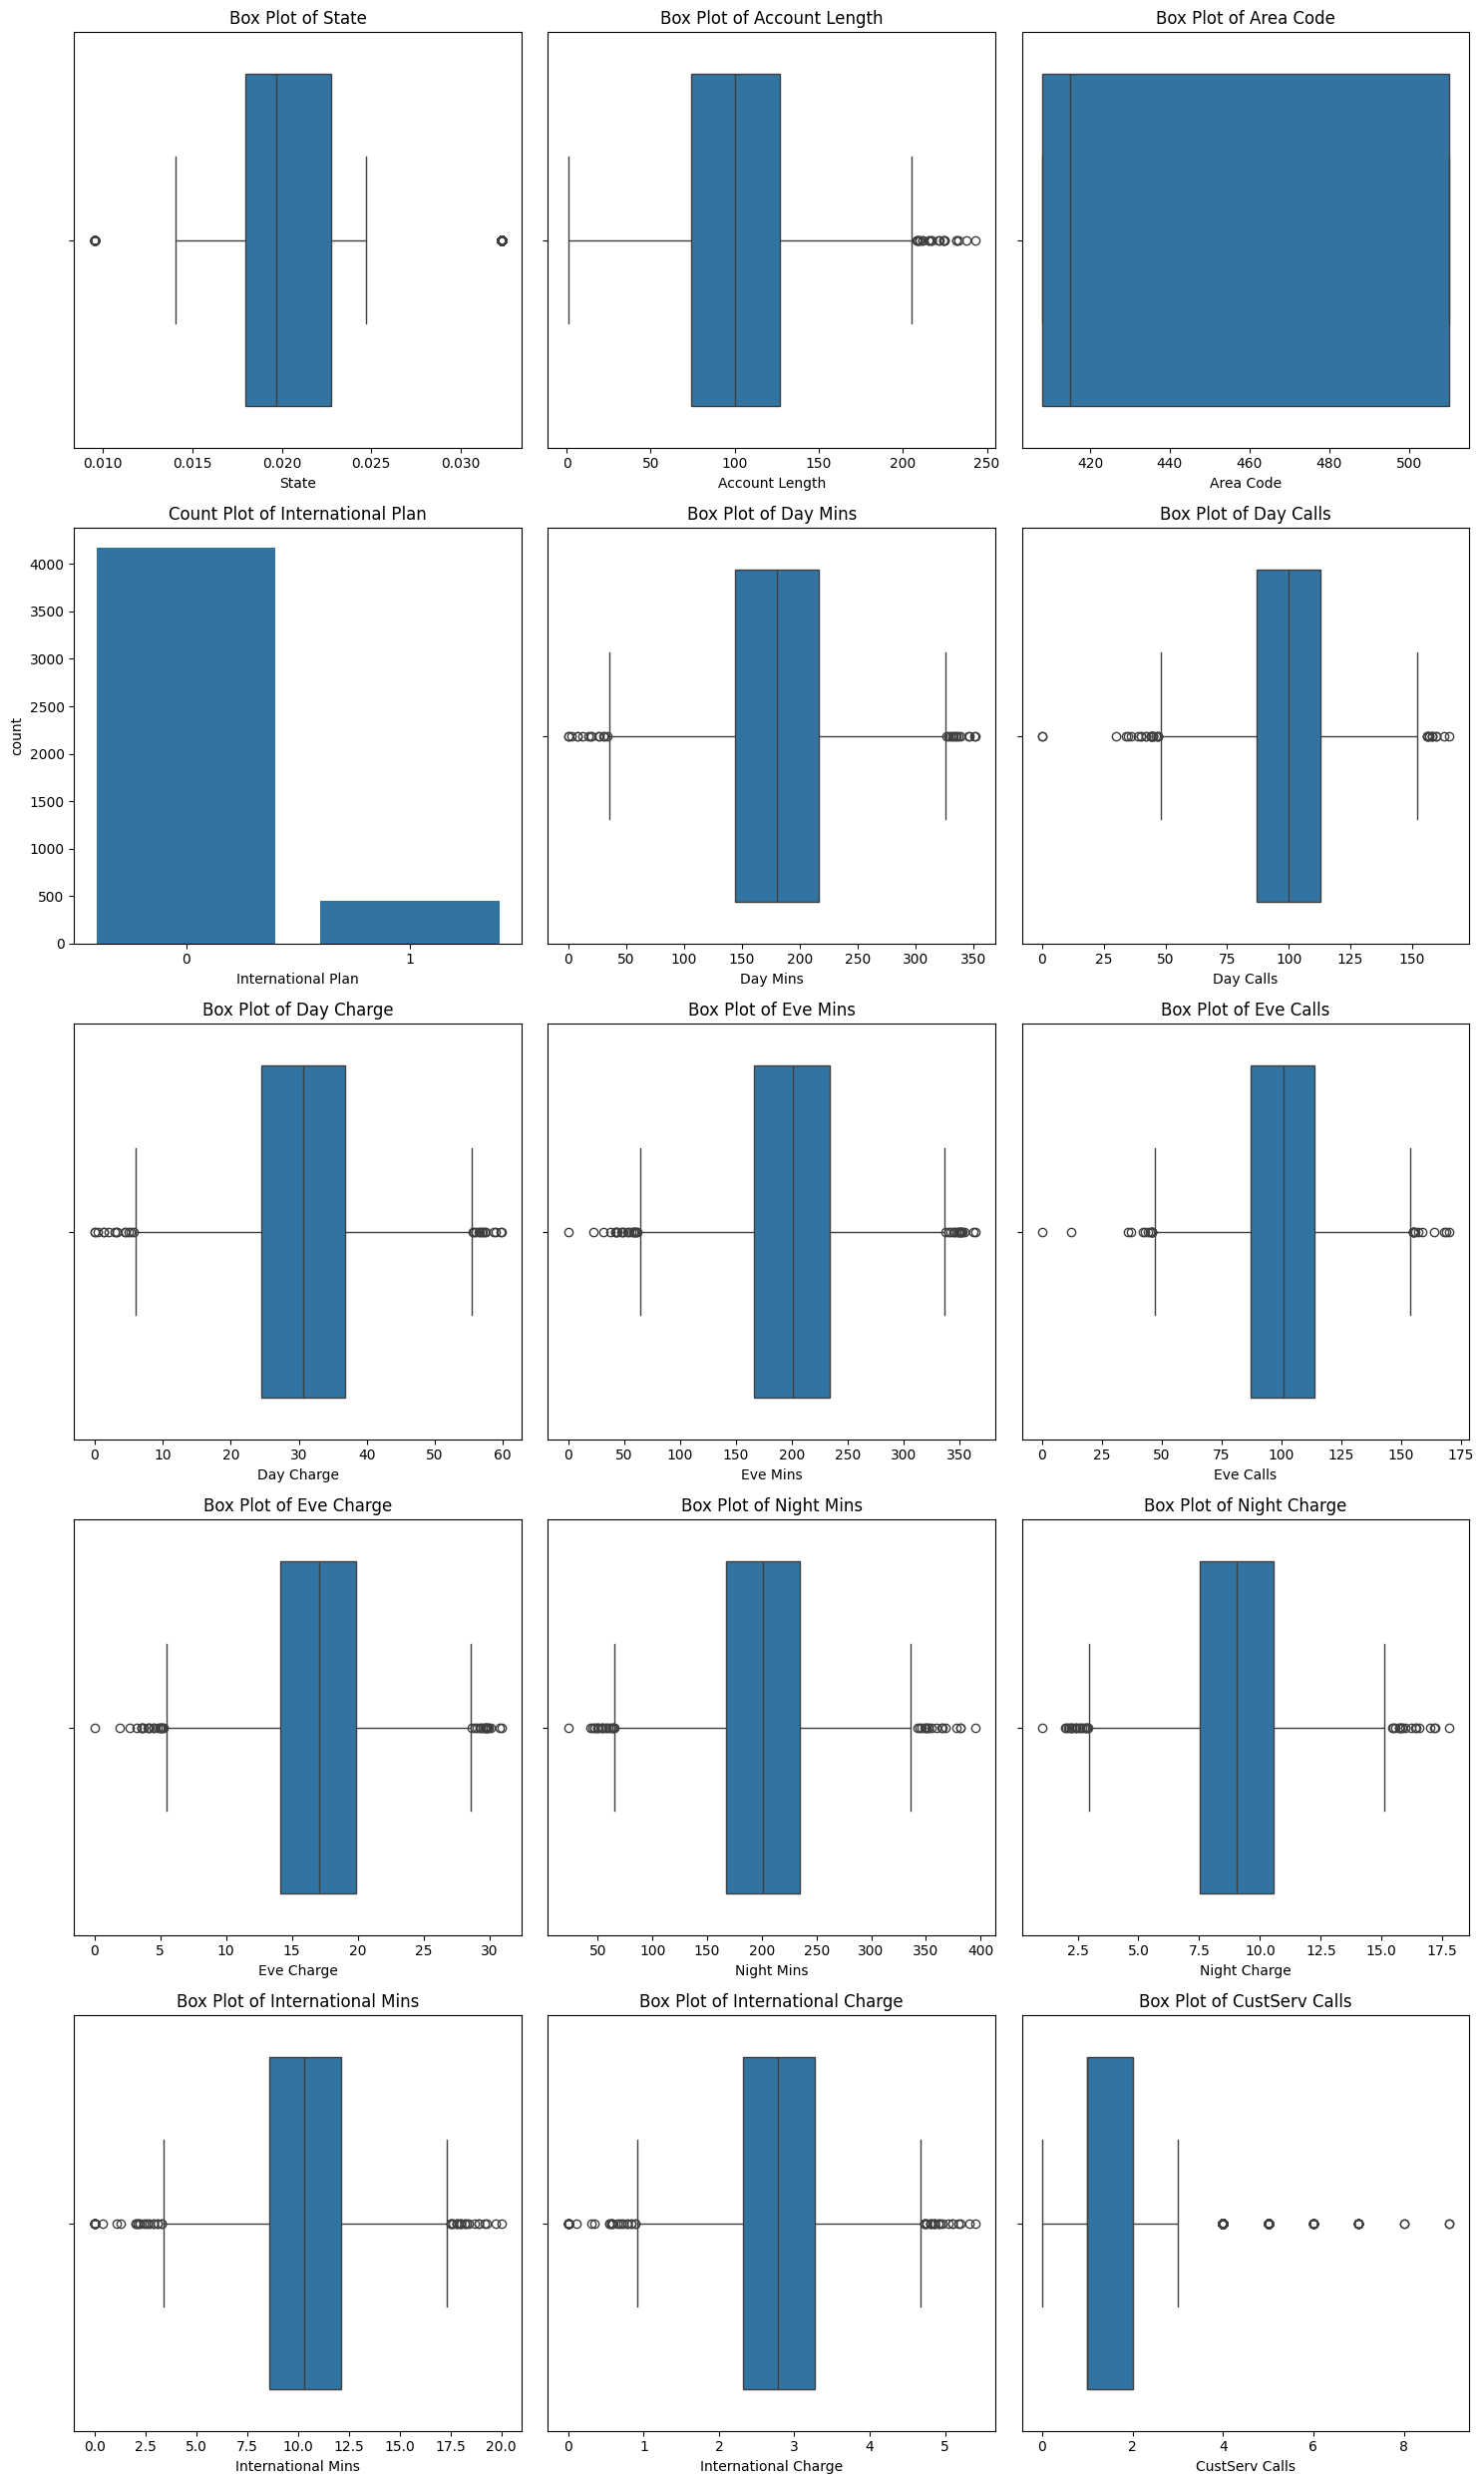

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which box plots need to be created
columns = [
    'State', 'Account Length', 'Area Code', 'International Plan',
    'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
    'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
    'International Charge', 'CustServ Calls',
]

# Number of columns to display per row in the plot grid
columns_per_row = 3

# Calculate the number of rows needed
num_rows = (len(columns) + columns_per_row - 1) // columns_per_row

# Create a figure with subplots
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    # Plotting only numerical columns, skip non-numeric ones
    if data[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[col])
    else:
        sns.countplot(x=data[col])  # Use countplot for categorical variables
    plt.title(f'Box Plot of {col}' if data[col].dtype in ['int64', 'float64'] else f'Count Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Quantile Calculation:

𝑄
1
Q1 (25th percentile) and 
𝑄
3
Q3 (75th percentile) are calculated for each numeric column.
The IQR is computed as 
𝑄
3
−
𝑄
1
Q3−Q1.
Outlier Detection:

Outliers are defined as values outside the range 
[
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
]
[Q1−1.5×IQR,Q3+1.5×IQR].
Result Summary:

For each column, the function prints the lower and upper bounds, the count of outliers, and the actual outlier values.
Output:

The function returns a dictionary (outlier_summary) where you can access the detailed analysis for each column.

In [36]:
import pandas as pd

def analyze_outliers_iqr(data, columns):
    outlier_summary = {}
    
    for column in columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            Q1 = data[column].quantile(0.25)  # First Quartile
            Q3 = data[column].quantile(0.75)  # Third Quartile
            IQR = Q3 - Q1  # Interquartile Range
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find outliers
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            outlier_count = len(outliers)
            
            # Store the analysis in a dictionary
            outlier_summary[column] = {
                "Lower Bound": lower_bound,
                "Upper Bound": upper_bound,
                "Number of Outliers": outlier_count,
                "Outliers": outliers[[column]]
            }
            
            print(f"\nColumn: {column}")
            print(f"Lower Bound: {lower_bound}")
            print(f"Upper Bound: {upper_bound}")
            print(f"Number of Outliers: {outlier_count}")
            print("Outliers:")
            print(outliers[[column]])
            
    return outlier_summary

# List of columns to analyze (numeric columns only)
columns_to_check = [
    "State", "Account Length", "Area Code", "Day Mins", "Day Calls", "Day Charge",
    "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Charge", 
    "International Mins", "International Charge", "CustServ Calls"
]

# Call the function on your dataset
outlier_analysis = analyze_outliers_iqr(data, columns_to_check)



Column: State
Lower Bound: -0.02014294996751137
Upper Bound: 0.09421702404158544
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [State]
Index: []

Column: Account Length
Lower Bound: -5.5
Upper Bound: 206.5
Number of Outliers: 23
Outliers:
      Account Length
197              208
238              215
309              209
416              224
817              243
1045             217
1093             210
1387             212
1408             232
1551             225
1751             225
1886             224
2150             212
2259             210
2277             217
2700             209
3216             221
3227             209
4260             238
4342             216
4379             222
4389             232
4395             233

Column: Area Code
Lower Bound: 255.0
Upper Bound: 663.0
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [Area Code]
Index: []

Column: Day Mins
Lower Bound: 34.049999999999955
Upper Bound: 326.45000000000005
Number of Outliers: 27
Outl

isnull() for Standard Missing Values:

Identifies standard representations of missing values such as NaN, None, and null.
Custom Missing Value Check:

Searches for additional placeholders for missing values (e.g., "NA", "N/A", "null", " ").
Combine Results:

Combines the counts of standard and custom missing values to calculate the total missing count.
Output:

Displays a summary showing the count of missing values (both standard and additional) for each column.

In [34]:
import pandas as pd
import numpy as np

def check_missing_values(data):
    # Standard missing values
    missing_count = data.isnull().sum()
    
    # Check for other representations of missing values
    other_missing_values = ["", " ", "NA", "N/A", "n/a", "null", "NULL", "NaN", "nan", "-", "--"]
    
    additional_missing = pd.DataFrame({
        col: data[col].apply(lambda x: x in other_missing_values).sum()
        for col in data.columns
    }, index=["Other Missing Count"]).T
    
    # Combine both checks
    total_missing = pd.DataFrame({
        "Standard Missing Count": missing_count,
        "Other Missing Count": additional_missing["Other Missing Count"],
        "Total Missing Count": missing_count + additional_missing["Other Missing Count"]
    })
    
    print("Summary of Missing Values:")
    print(total_missing)
    return total_missing

# Call the function on your dataset
missing_summary = check_missing_values(data)


Summary of Missing Values:
                      Standard Missing Count  Other Missing Count  \
State                                      0                    0   
Account Length                             0                    0   
Area Code                                  0                    0   
International Plan                         0                    0   
Day Mins                                   0                    0   
Day Calls                                  0                    0   
Day Charge                                 0                    0   
Eve Mins                                   0                    0   
Eve Calls                                  0                    0   
Eve Charge                                 0                    0   
Night Mins                                 0                    0   
Night Charge                               0                    0   
International Mins                         0                    0   
Interna

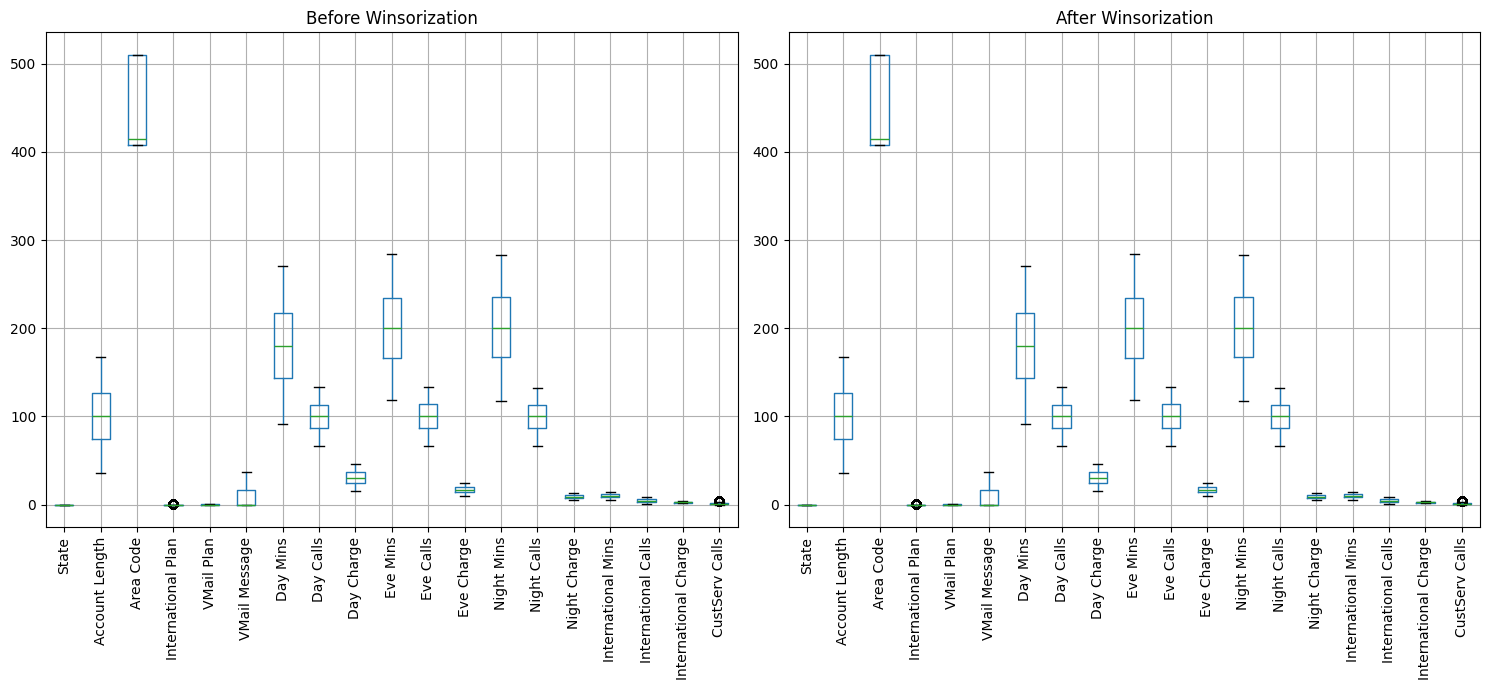

In [24]:
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

# Define the columns to Winsorize
columns_to_winsorize = [
    'State', 'Account Length', 'Area Code', 'International Plan',
    'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
    'Night Charge', 'International Mins', 'International Calls',
    'International Charge', 'CustServ Calls'
]

# Define the percentile limits for Winsorization (e.g., 1% and 99%)
lower_limit = 0.05  # Lower 5%
upper_limit = 0.05  # Upper 5% (complement for 95%)

# Apply Winsorization
for col in columns_to_winsorize:
    if col in data.columns:  # Ensure the column exists in the dataset
        try:
            # Winsorize the column
            data[col] = winsorize(data[col], limits=(lower_limit, upper_limit))
        except Exception as e:
            print(f"Error processing column {col}: {e}")

# Visualize Before and After Winsorization
plt.figure(figsize=(15, 7))

# Before Winsorization (if you have the original data backed up)
plt.subplot(1, 2, 1)
data[columns_to_winsorize].boxplot(rot=90)
plt.title('Before Winsorization')

# After Winsorization
plt.subplot(1, 2, 2)
data[columns_to_winsorize].boxplot(rot=90)
plt.title('After Winsorization')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_16096\3487166172.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')  # Customize palette


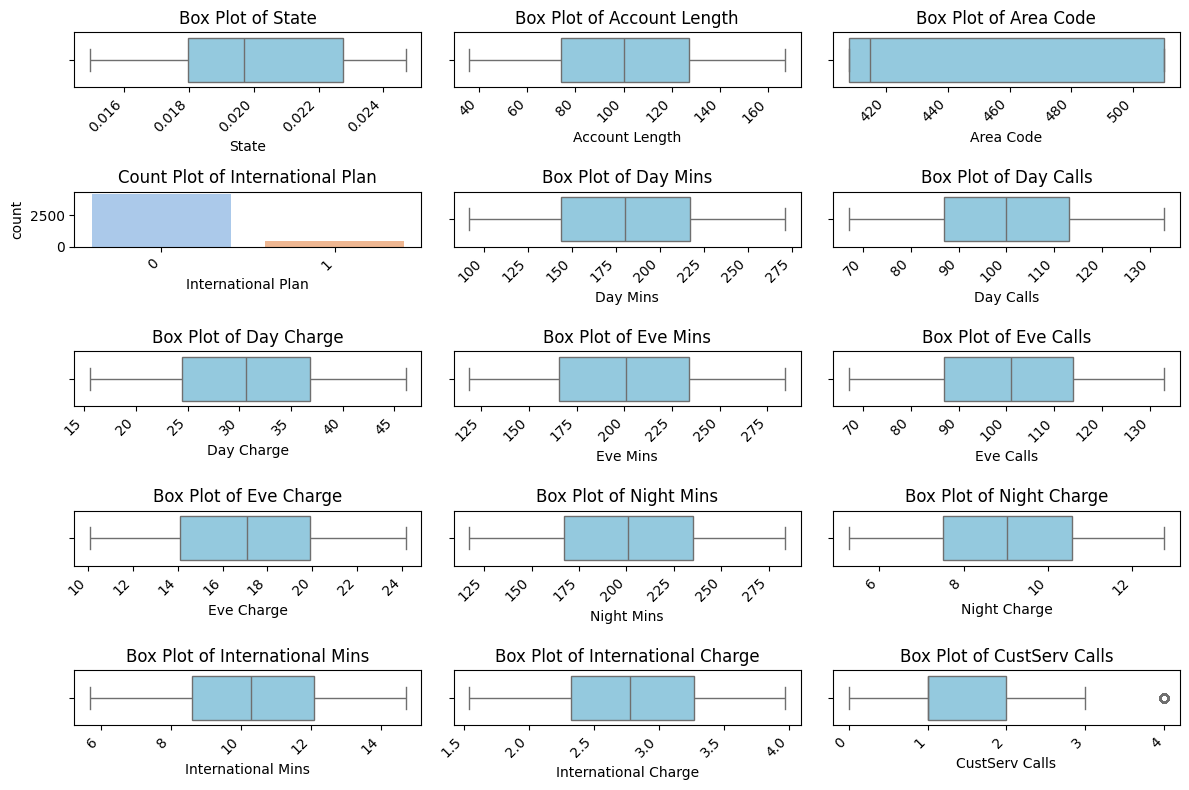

In [25]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, columns_per_row, i)

    if data[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[col], color='skyblue')  # Customize color
    else:
        sns.countplot(x=data[col], palette='pastel')  # Customize palette

    plt.title(f'Box Plot of {col}' if data[col].dtype in ['int64', 'float64'] else f'Count Plot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show() 